# 1. Decision Tree Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
data = np.sort(np.random.uniform(low=0, high=5, size=(80, 1)))
label = np.sin(data).ravel()
label[::5] += 3 * (0.5 - np.random.uniform(0, 1, 16))

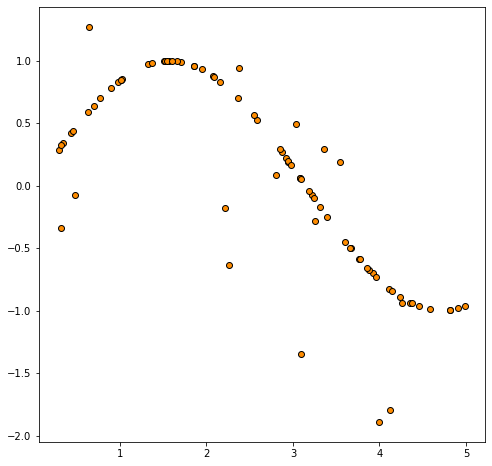

In [3]:
# 데이터는 하나의 변수를 가지며 변수에 따른 정답 시각화
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")

### 1.2 Viz Data

In [4]:
viz_test_data = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
viz_test_data[:5]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04]])

# 2. Decion Tree Regressor
- Tree의 분할이 이루어질 때마다 어떻게 예측을 하는지 확인

### 2.1 분할 없는 경우
- 학습 데이터의 평균으로 예측

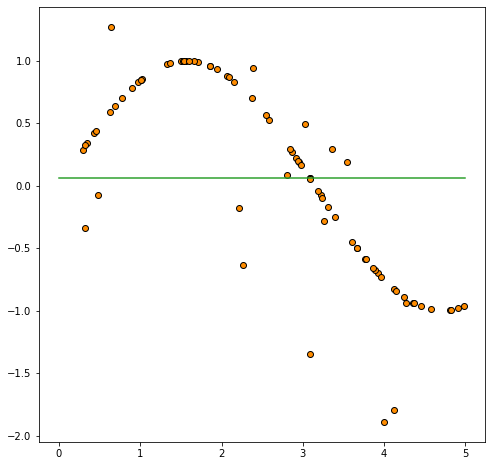

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

viz_test_pred = np.repeat(label.mean(), len(viz_test_data))

plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, viz_test_pred, color="C2")

In [6]:
# mse variance 계산
train_pred = np.repeat(label.mean(), len(data))
mse_var = np.var(label - train_pred)

print(f"no divide mse variance: {mse_var:.3f}")

no divide mse variance: 0.580


### 2.2 첫번째 분할

In [7]:
first_divide = DecisionTreeRegressor(max_depth=1)
first_divide.fit(data, label)

DecisionTreeRegressor(max_depth=1)

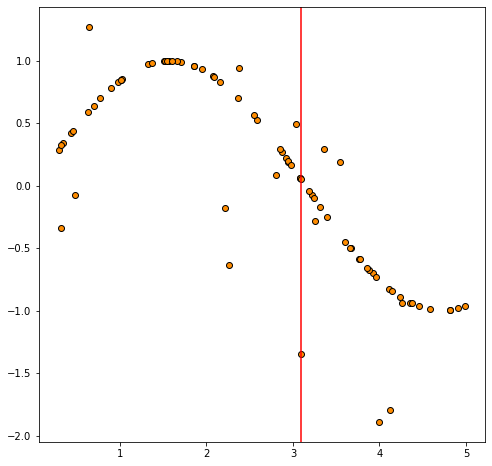

In [8]:
first_divide_pred = first_divide.predict(viz_test_data)

plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")

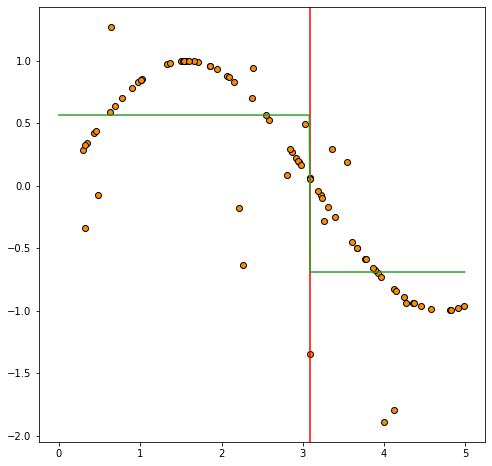

In [9]:
# 분할 이루어진 영역에서 다시 평균 계산
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")
plt.plot(viz_test_data, first_divide_pred, color="C2")

[Text(167.4, 163.07999999999998, 'X[0] <= 3.088\nmse = 0.58\nsamples = 80\nvalue = 0.062'),
 Text(83.7, 54.360000000000014, 'mse = 0.179\nsamples = 48\nvalue = 0.565'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.236\nsamples = 32\nvalue = -0.691')]

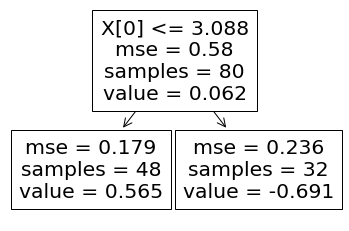

In [10]:
# Tree 시각화(plot_tree 함수)
plot_tree(first_divide)

### 2.3 두번째 분할

In [11]:
second_divide = DecisionTreeRegressor(max_depth=2)
second_divide.fit(data, label)

DecisionTreeRegressor(max_depth=2)

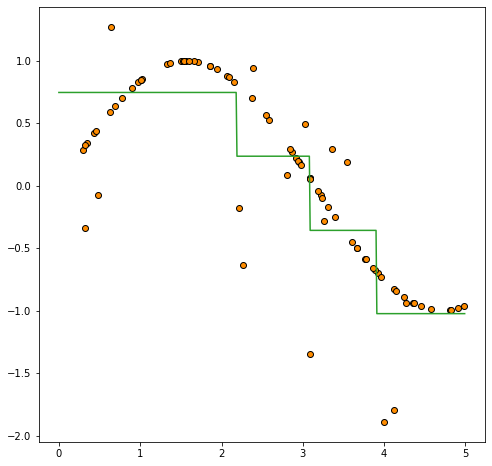

In [12]:
second_divide_pred = second_divide.predict(viz_test_data)

plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, second_divide_pred, color="C2")

[Text(167.4, 181.2, 'X[0] <= 3.088\nmse = 0.58\nsamples = 80\nvalue = 0.062'),
 Text(83.7, 108.72, 'X[0] <= 2.185\nmse = 0.179\nsamples = 48\nvalue = 0.565'),
 Text(41.85, 36.23999999999998, 'mse = 0.119\nsamples = 31\nvalue = 0.745'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.12\nsamples = 17\nvalue = 0.235'),
 Text(251.10000000000002, 108.72, 'X[0] <= 3.903\nmse = 0.236\nsamples = 32\nvalue = -0.691'),
 Text(209.25, 36.23999999999998, 'mse = 0.147\nsamples = 16\nvalue = -0.358'),
 Text(292.95, 36.23999999999998, 'mse = 0.104\nsamples = 16\nvalue = -1.025')]

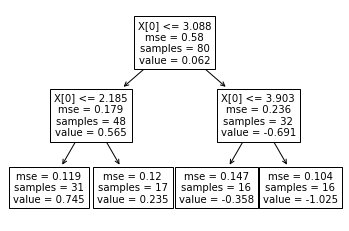

In [13]:
plot_tree(second_divide)

# 3. Depth에 따른 변화

In [14]:
shallow_depth_tree = DecisionTreeRegressor(max_depth=2)
deep_depth_tree = DecisionTreeRegressor(max_depth=5)

shallow_depth_tree.fit(data, label)
deep_depth_tree.fit(data, label)

DecisionTreeRegressor(max_depth=5)

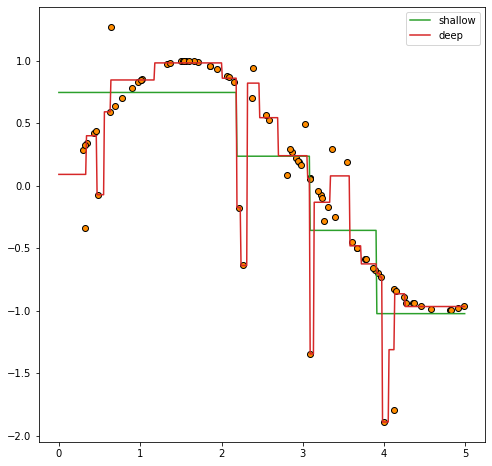

In [15]:
shallow_pred = shallow_depth_tree.predict(viz_test_data)
deep_pred = deep_depth_tree.predict(viz_test_data)

plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, shallow_pred, color="C2", label="shallow")
plt.plot(viz_test_data, deep_pred, color="C3", label="deep")
plt.legend()